#**AIM**:Develop an automated MRI preprocessing system that applies cropping and 2D transformations (rotation, scaling, and shearing) to enhance alignment, remove irrelevant regions, and improve image quality for accurate medical analysis

<ipython-input-65-53d9936cbb89>:42: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(3,3,7),plt.hist(cropped.ravel(), 256, [0,256]),plt.title('Histogram')


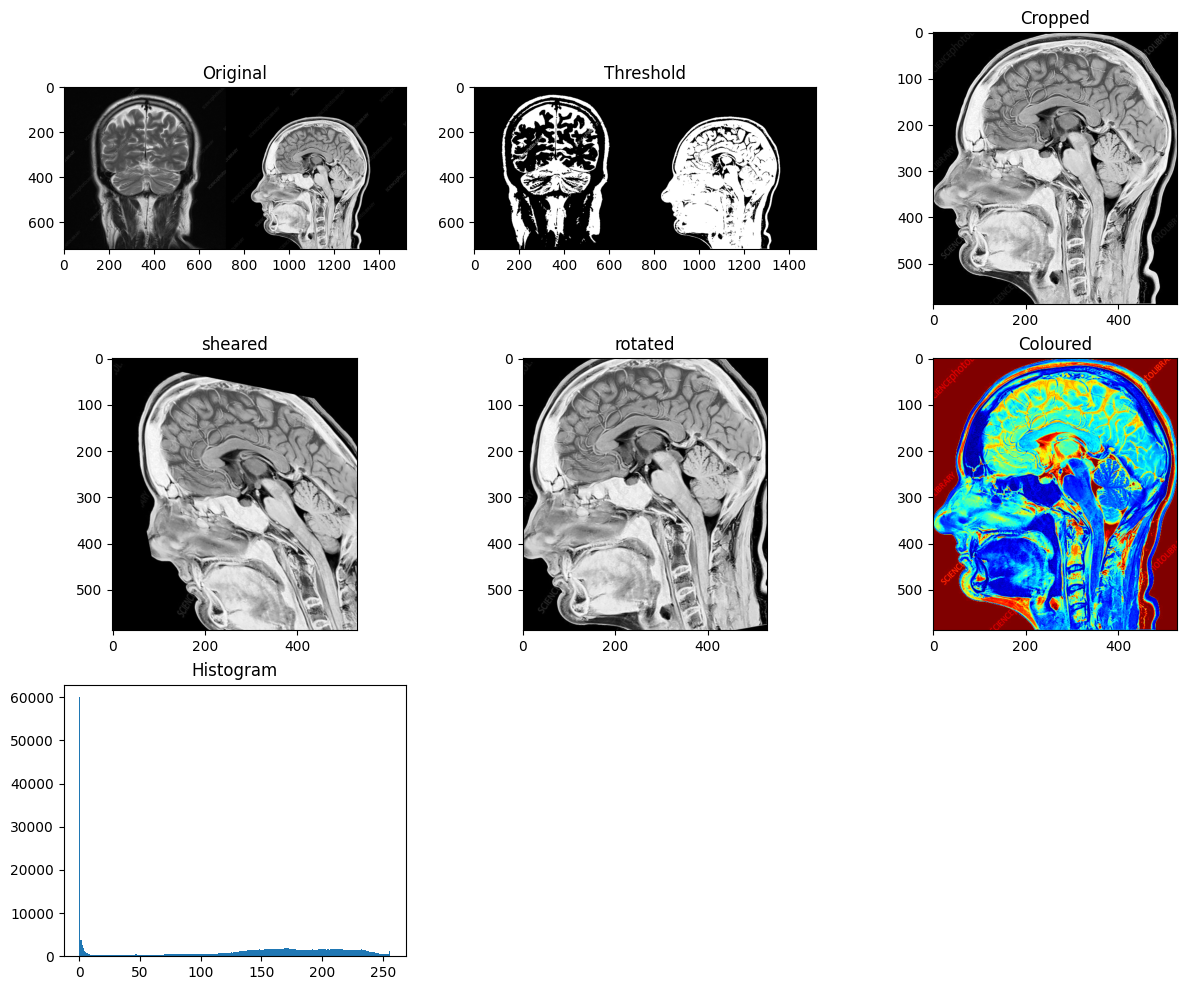

In [ ]:
#importing lib
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#importing image
path = "image.jpg"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#cv2_imshow(img)

#thresholding:
_, thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
#cv2_imshow(thresh)

#contouring & cropping:
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

x,y,w,h = cv2.boundingRect(max(contours, key=cv2.contourArea))
cropped = img[y:y+h, x:x+w]

h,w = cropped.shape
center = (w//2, h//2)
M_rot = cv2.getRotationMatrix2D(center, 10, 1.1)
M_shear = np.float32([[1,0.2,0],[0.2,1,0]])
rotated = cv2.warpAffine(cropped, M_rot, (w,h))
sheared = cv2.warpAffine(rotated, M_shear, (w,h))

pts1 = np.float32([[0,0],[w-1,0], [w-1,h-1],[0,h-1]])
pts2 = np.float32([[0,0],[w-1,100], [w-1,h-1],[0,h-1]])

coloured=cv2.applyColorMap(cropped, cv2.COLORMAP_JET)

#plotting images:
plt.figure(figsize=(15,12))
plt.subplot(3,3,1),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.subplot(3,3,2),plt.imshow(thresh, cmap='gray'),plt.title('Threshold')
plt.subplot(3,3,3),plt.imshow(cropped, cmap='gray'),plt.title('Cropped')
plt.subplot(3,3,4),plt.imshow(sheared, cmap='gray'),plt.title('sheared')
plt.subplot(3,3,5),plt.imshow(rotated, cmap='gray'),plt.title('rotated')
plt.subplot(3,3,6),plt.imshow(coloured),plt.title('Coloured')
plt.subplot(3,3,7),plt.hist(cropped.ravel(), 256, [0,256]),plt.title('Histogram')
plt.show()